데이터 길이: 365 
앞쪽 5개 값: [[8818.6]
 [8800.3]
 [9317.2]
 [9662.7]
 [9942.7]]


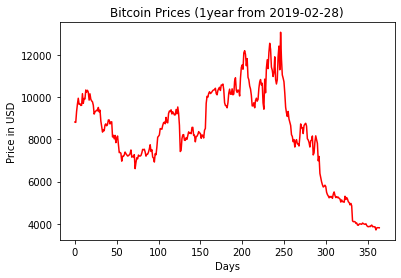

In [7]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

coindesk_data = pd.read_csv('bit-coin.csv',encoding='cp949')
seq = coindesk_data[['종가']].to_numpy()
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

plt.plot(seq,color='red')
plt.title('Bitcoin Prices (1year from 2019-02-28)')
plt.xlabel('Days')
plt.ylabel('Price in USD')
plt.show()

데이터 길이: 365 
앞쪽 5개 값: [[8818.6]
 [8800.3]
 [9317.2]
 [9662.7]
 [9942.7]]


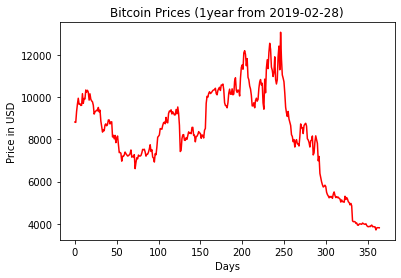

Epoch 1/200
250/250 - 2s - loss: 1192.7927 - mae: 1192.7927 - val_loss: 299.3835 - val_mae: 299.3835 - 2s/epoch - 10ms/step
Epoch 2/200
250/250 - 1s - loss: 541.2324 - mae: 541.2324 - val_loss: 284.1583 - val_mae: 284.1583 - 997ms/epoch - 4ms/step
Epoch 3/200
250/250 - 1s - loss: 540.1508 - mae: 540.1508 - val_loss: 278.4516 - val_mae: 278.4516 - 1s/epoch - 5ms/step
Epoch 4/200
250/250 - 1s - loss: 501.6155 - mae: 501.6155 - val_loss: 519.5431 - val_mae: 519.5431 - 1s/epoch - 4ms/step
Epoch 5/200
250/250 - 1s - loss: 500.5719 - mae: 500.5719 - val_loss: 264.6024 - val_mae: 264.6024 - 1s/epoch - 4ms/step
Epoch 6/200
250/250 - 1s - loss: 502.2612 - mae: 502.2612 - val_loss: 301.0691 - val_mae: 301.0691 - 1s/epoch - 5ms/step
Epoch 7/200
250/250 - 1s - loss: 502.6122 - mae: 502.6122 - val_loss: 326.3044 - val_mae: 326.3044 - 1s/epoch - 5ms/step
Epoch 8/200
250/250 - 1s - loss: 522.2673 - mae: 522.2673 - val_loss: 254.3898 - val_mae: 254.3898 - 1s/epoch - 4ms/step
Epoch 9/200
250/250 - 1s -

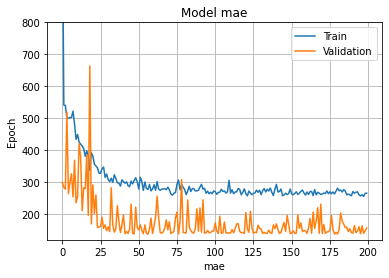

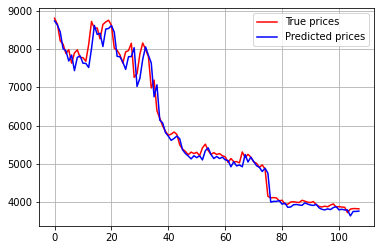

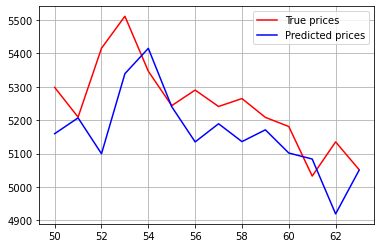

In [13]:
#2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

coindesk_data = pd.read_csv('bit-coin.csv',encoding='cp949')
seq = coindesk_data[['종가']].to_numpy()
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

plt.plot(seq,color='red')
plt.title('Bitcoin Prices (1year from 2019-02-28)')
plt.xlabel('Days')
plt.ylabel('Price in USD')
plt.show()

def seq2dataset(seq,window,horizon):
  X=[];Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x);Y.append(y)
  return np.array(X),np.array(Y)

w=7
h=1

X,Y = seq2dataset(seq,w,h)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split = int(len(X)*0.7)
x_train=X[0:split]; y_train = Y[0:split]
x_test=X[split:]; y_test = Y[split:]

model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev = model.evaluate(x_test,y_test,verbose=0)
print("손실함수:",ev[0],"MAE",ev[1])

pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.xlabel('mae')
plt.ylabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True prices','Predicted prices'],loc='best')
plt.grid()
plt.show()

x_range=range(50,64)
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True prices','Predicted prices'],loc='best')
plt.grid()
plt.show()


(358, 7, 4) (358, 4)
[[8818.6 8800.1 8968.3 8538.5]
 [8800.3 9317.1 9368.1 8672. ]
 [9317.2 9662.6 9672.3 9269.8]
 [9662.7 9943.2 9981.  9507. ]
 [9942.7 9655.6 9965.6 9653.4]
 [9655.7 9684.5 9706.5 9569.8]
 [9684.5 9602.2 9747.1 9574.5]] [9602.4 9611.9 9681.4 9448.9]
Epoch 1/200
250/250 - 4s - loss: 1807.8501 - mae: 1807.8501 - val_loss: 429.6475 - val_mae: 429.6475 - 4s/epoch - 14ms/step
Epoch 2/200
250/250 - 1s - loss: 496.8948 - mae: 496.8948 - val_loss: 536.7523 - val_mae: 536.7523 - 1s/epoch - 5ms/step
Epoch 3/200
250/250 - 1s - loss: 514.8862 - mae: 514.8862 - val_loss: 283.0361 - val_mae: 283.0361 - 1s/epoch - 5ms/step
Epoch 4/200
250/250 - 1s - loss: 511.1796 - mae: 511.1796 - val_loss: 268.6851 - val_mae: 268.6851 - 1s/epoch - 4ms/step
Epoch 5/200
250/250 - 1s - loss: 474.4242 - mae: 474.4242 - val_loss: 281.3411 - val_mae: 281.3411 - 1s/epoch - 4ms/step
Epoch 6/200
250/250 - 1s - loss: 489.4228 - mae: 489.4228 - val_loss: 281.0915 - val_mae: 281.0915 - 1s/epoch - 5ms/step
Ep

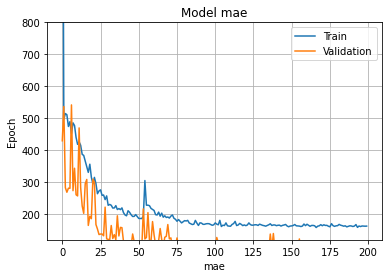

In [16]:
#3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

coindesk_data = pd.read_csv('bit-coin.csv',encoding='cp949')
seq = coindesk_data[['종가','오픈','고가','저가']].to_numpy()

def seq2dataset(seq,window,horizon):
  X=[];Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x);Y.append(y)
  return np.array(X),np.array(Y)

w=7
h=1

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split = int(len(X)*0.7)
x_train=X[0:split]; y_train = Y[0:split]
x_test=X[split:]; y_test = Y[split:]

model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev = model.evaluate(x_test,y_test,verbose=0)
print("손실함수:",ev[0],"MAE",ev[1])

pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.xlabel('mae')
plt.ylabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()